In [62]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [63]:
from sklearn.datasets import make_circles
c = 5000
A, b = make_circles(c, noise=0.01, random_state=5)

In [64]:
A

array([[ 0.99345155,  0.05568483],
       [-0.82713254, -0.55599145],
       [ 0.21530333,  0.77537678],
       ...,
       [-0.54609362, -0.6012621 ],
       [ 0.83959435, -0.56807399],
       [ 0.40998764,  0.68746659]])

In [65]:
b

array([0, 0, 1, ..., 1, 0, 1])

In [66]:
A.shape

(5000, 2)

In [67]:
b.shape

(5000,)

In [68]:
circles = pd.DataFrame({'X0': A[:,0],
                        'X1': A[:,1],
                        'label': b})

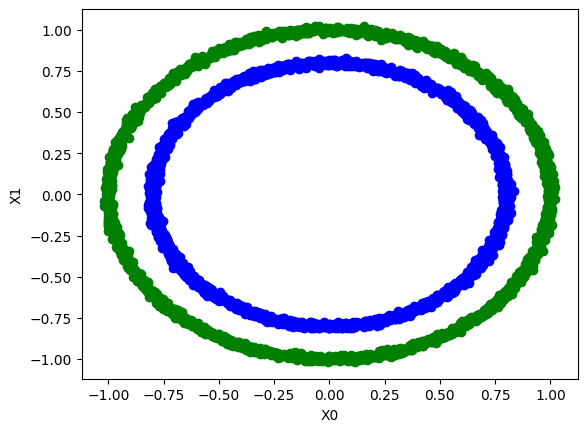

In [69]:
plt.scatter(circles['X0'][circles['label'] == 0], circles['X1'][circles['label'] == 0], color='green')
plt.scatter(circles['X0'][circles['label'] == 1], circles['X1'][circles['label'] == 1], color='blue')
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()

In [70]:
import sklearn
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(A,b,test_size=0.2,random_state=22)

In [71]:
tf.random.set_seed(42)

model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation = 'sigmoid'),
    tf.keras.layers.Dense(66, activation = 'sigmoid'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model1.compile( loss = tf.keras.losses.BinaryCrossentropy, optimizer = tf.keras.optimizers.Adam(learning_rate=0.001), metrics = ['accuracy'] )

model1.fit(x_train, y_train, epochs = 100, verbose=0)

model1_evaluation = model1.evaluate(x_test, y_test)
print(f"model 1 evaluation: {model1_evaluation}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 0.0085  
model 1 evaluation: [0.00814125407487154, 1.0]


In [72]:
tf.random.set_seed(42)

model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model2.compile( loss = tf.keras.losses.BinaryCrossentropy, optimizer = tf.keras.optimizers.Adam(learning_rate=0.001), metrics = ['accuracy'] )

model2.fit(x_train, y_train, epochs = 100, verbose=1)

model2_evaluation = model2.evaluate(x_test, y_test)
print(f"model 2 evaluation: {model2_evaluation}")

Epoch 1/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5066 - loss: 0.6915
Epoch 2/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5155 - loss: 0.6908
Epoch 3/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5161 - loss: 0.6900
Epoch 4/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5215 - loss: 0.6891
Epoch 5/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5267 - loss: 0.6875
Epoch 6/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5343 - loss: 0.6827
Epoch 7/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5278 - loss: 0.6785
Epoch 8/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5347 - loss: 0.6746
Epoch 9/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5639 - loss: 0.6705
Epoch 10/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5855 - loss: 0.6661
Epoch 11/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5955 - loss: 0.6614
Epoch 12/100
125/125 ━━━━━━━━━━━━━━━━━━━━

In [73]:
def plot_decision_boundary(model, X, y):
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), # number between 0-10
np.linspace(y_min, y_max, 100))

  # Create X values (we're going to make predictions)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack

  # Make predictions
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("doing multiclass classification")
    # We have to reshape
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)
    # Plot
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
doing binary classification


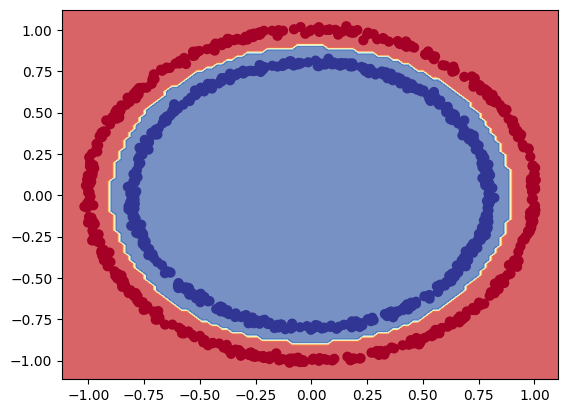

In [74]:
plot_decision_boundary(model1, x_test, y_test)

In [75]:
tf.random.set_seed(42)

model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')

])

model2.compile( loss = tf.keras.losses.BinaryCrossentropy, optimizer = tf.keras.optimizers.Adam(learning_rate=0.001), metrics = ['accuracy'] )

model2.fit(x_train, y_train, epochs = 120, verbose=1)

model2_evaluation = model2.evaluate(x_test, y_test)
print(f"model 2 evaluation: {model2_evaluation}")

Epoch 1/120
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4883 - loss: 0.7205
Epoch 2/120
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4456 - loss: 0.7040
Epoch 3/120
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4745 - loss: 0.6977
Epoch 4/120
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4759 - loss: 0.6932
Epoch 5/120
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4916 - loss: 0.6891
Epoch 6/120
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5317 - loss: 0.6853
Epoch 7/120
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5414 - loss: 0.6821
Epoch 8/120
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5587 - loss: 0.6786
Epoch 9/120
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5636 - loss: 0.6747
Epoch 10/120
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5687 - loss: 0.6707
Epoch 11/120
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5768 - loss: 0.6650
Epoch 12/120
125/125 ━━━━━━━━━━━━━━━━━━━━

In [76]:
print(f"model 2 evaluation: {model2_evaluation}")

model 2 evaluation: [0.000870805699378252, 1.0]


In [77]:
def plot_decision_boundary(model, X, y):
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), # number between 0-10
np.linspace(y_min, y_max, 100))

  # Create X values (we're going to make predictions)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack

  # Make predictions
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("doing multiclass classification")
    # We have to reshape
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)
    # Plot
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
doing binary classification


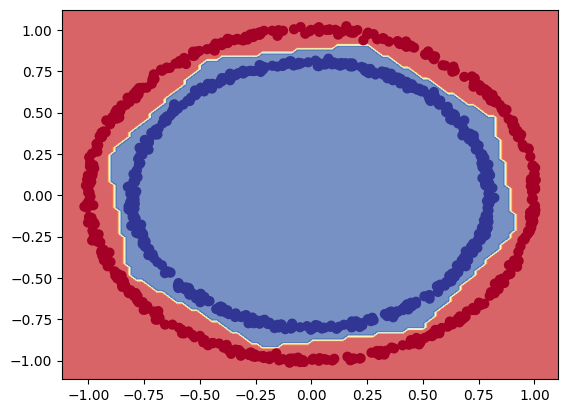

In [78]:
plot_decision_boundary(model2, x_test, y_test)

In [83]:
tf.random.set_seed(92)

model3 = tf.keras.Sequential([
    tf.keras.layers.Dense(5, activation = 'relu'),
    tf.keras.layers.Dense(3, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid'),
    tf.keras.layers.Dense(3, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model3.compile( loss = tf.keras.losses.BinaryCrossentropy, optimizer = tf.keras.optimizers.Adam(learning_rate=0.001), metrics = ['accuracy'] )

model3.fit(x_train, y_train, epochs = 100, verbose=0)

model3_evaluation = model3.evaluate(x_test, y_test)
print(f"model 3 evaluation: {model3_evaluation}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 0.0033  
model 3 evaluation: [0.0034556183964014053, 1.0]


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
doing binary classification


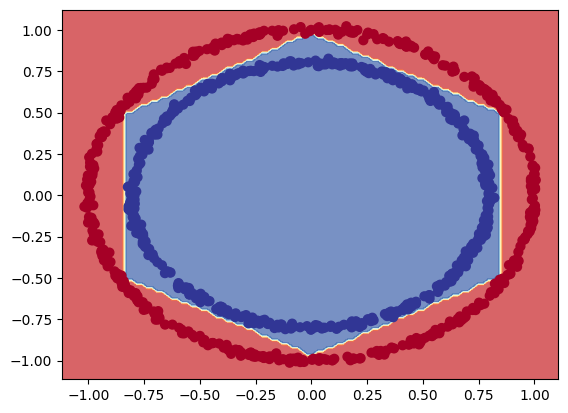

In [84]:
plot_decision_boundary(model3, x_test, y_test)